In [1]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    #print(y)
    #print(W)
    #print(X[0][1])
    #print(W + X[0].T)
    for i in range(len(y)):
        c = np.matmul(X[i],W) + b
        if c[0] >= 0:
            result = 1
        else: 
            result = 0
        if (result == 1) and y[i] == 0 :
            b = b - learn_rate
            W[0] = W[0] - learn_rate * X[i][0]
            W[1] = W[1] - learn_rate * X[i][1]
        elif (result == 0) and y[i] == 1 :
            b = b + learn_rate
            W[0] = W[0] + learn_rate * X[i][0]
            W[1] = W[1] + learn_rate * X[i][1]
    
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 50):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


In [2]:
import pandas as pd

In [29]:
datos = pd.read_csv('data.csv')

In [30]:
X= datos[['x','y']].values

In [31]:
label = datos.label.values

In [38]:
x_min, x_max = min(X.T[0]), max(X.T[0])

In [43]:
boundary_lines = trainPerceptronAlgorithm(X, label, learn_rate = 0.01, num_epochs = 50)

In [14]:
import matplotlib.pyplot as plt

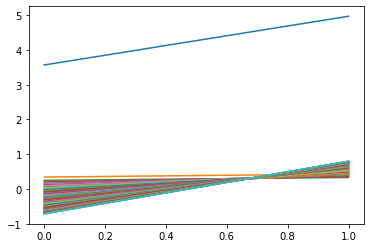

In [44]:
for l in range(len(boundary_lines)):
    plt.plot(boundary_lines[l])


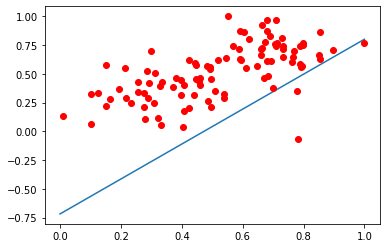

In [45]:
plt.plot(boundary_lines[-1])
plt.plot(datos.x.values,datos.y.values,'ro')

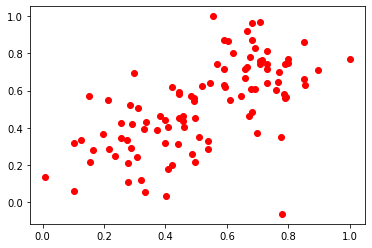

In [20]:
plt.plot(datos.x.values,datos.y.values,'ro')

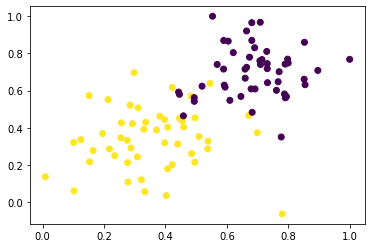

In [35]:
plt.scatter(datos.x,datos.y,c=datos.label)

In [55]:
boundary_lines[0][1]

array([4.97079108])

In [60]:
def draw_lines(boundary_lines,X):
    for i in range(len(boundary_lines)):
        point_a = (X[0][0], X[10][0])
        point_b = (X[0][0] * boundary_lines[i][0]+boundary_lines[i][1], X[10][0] * boundary_lines[i][0]+boundary_lines[i][1])
        plt.plot(point_a,point_b)
        
    

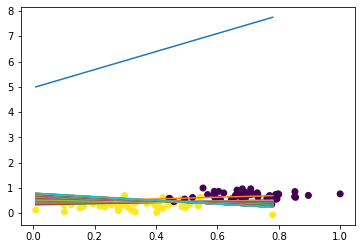

In [62]:
draw_lines(boundary_lines,X)
plt.scatter(datos.x,datos.y,c=datos.label)

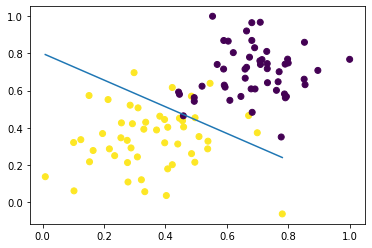

In [64]:
point_a = (X[0][0], X[10][0])
point_b = (X[0][0] * boundary_lines[-1][0]+boundary_lines[-1][1], X[10][0] * boundary_lines[-1][0]+boundary_lines[-1][1])
plt.plot(point_a,point_b)
plt.scatter(datos.x,datos.y,c=datos.label)